
# Codealong Exploring SVMs Using Sklearn



---

In [26]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load the handwritten digits dataset.

In [27]:
# new dataset, handwritten digits!
digits = datasets.load_digits()
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [28]:
len(digits.data)      # 1,797 observations

1797

In [29]:
len(digits.data[0])   # 8 x 8 pixel image

64

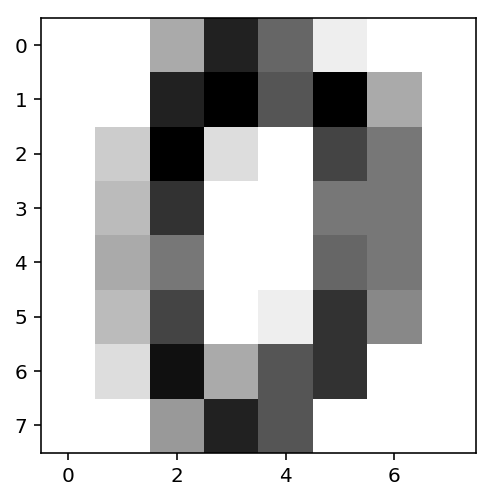

In [31]:
# the number 0
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [32]:
digits.target[0]

0

In [33]:
digits_X, digits_y = digits.data, digits.target

In [34]:
digits_X.shape

(1797, 64)

### 2. Cross-validate a logistic regression on the data.

In [35]:
# What if we just use logistic regression without doing anything?
logistic = linear_model.LogisticRegression()
cross_val_score(logistic, digits_X, digits_y, cv=5, scoring='accuracy').mean()


0.92101881133607011

### 3. Cross-validate a SVM on the data.

In [36]:
# Let's try an SVM
clf = svm.SVC()
print cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean()

# OOF, we even lost to the logistic regression....
# what is the default behaviour of the model?

clf = svm.SVC(kernel='linear')
print cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean()

0.448786800616
0.949334872621


## Gaussian SVM has two parameters, gamma and C

---

### gamma

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. 

The higher the value of gamma, the more it will try to exactly fit the training data set. Will cause over-fitting problem.
- small gamma: the model is constrained, can under-fit!  high bias and low variance.
- big gamma: Tries to capture the shape too well: can over-fit!  low bias and high variance.

<img src="http://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_15.png">



### C

Penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. C can be thought of as the parameter for the soft margin cost function, which controls the influence of each individual support vector

- small C: makes the decision surface smooth and simple, softer margin can under-fit! high bias and low variance.
- big C: selects more support vectors: can over-fit! harder margin. low bias and high variance.

<img src="http://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_18.png">


### 4. Fit an SVM modifying the default gamma and C.

In [37]:
# note the scale of gamma and C
clf = svm.SVC(gamma=0.001, C=1)
cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean()

0.9716361987950688

### 5. Gridsearch an optimal gamma with C=1.

In [39]:
# Warning SLOWWWWW
from sklearn.model_selection import GridSearchCV

clf = svm.SVC(C=1)
gamma_range = np.logspace(-5, 2, 20)
param_grid = dict(gamma=gamma_range)

grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(digits_X, digits_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   52.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': array([  1.00000e-05,   2.33572e-05,   5.45559e-05,   1.27427e-04,
         2.97635e-04,   6.95193e-04,   1.62378e-03,   3.79269e-03,
         8.85867e-03,   2.06914e-02,   4.83293e-02,   1.12884e-01,
         2.63665e-01,   6.15848e-01,   1.43845e+00,   3.35982e+00,
         7.84760e+00,   1.83298e+01,   4.28133e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [40]:
grid.best_params_

{'gamma': 0.001623776739188721}

In [41]:
# check the results of the grid search
grid_mean_scores = [result[1] for result in grid.grid_scores_]
grid_mean_scores

/Users/phillippa/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[0.8853644963828603,
 0.91652754590984975,
 0.93544796883695047,
 0.9476905954368392,
 0.95882025598219256,
 0.96883695047301055,
 0.96994991652754592,
 0.93878686700055647,
 0.72287145242070117,
 0.27267668336115747,
 0.11018363939899833,
 0.10350584307178631,
 0.1018363939899833,
 0.1018363939899833,
 0.11853088480801335,
 0.10406232609905398,
 0.10239287701725097,
 0.10127991096271564,
 0.10127991096271564,
 0.10127991096271564]

### 6. Gridsearch the optimal C, gamma, and kernel.

In [15]:
# Warning SUPER MEGAAA SLOWWWWW
from sklearn.grid_search import GridSearchCV
clf = svm.SVC()

gamma_range = np.logspace(-5, 2, 10)
C_range = np.logspace(-3, 2, 10)
kernel_range = ['rbf', 'sigmoid', 'linear', 'poly']

param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)

grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(digits_X, digits_y)

/Users/phillippa/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  3.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'sigmoid', 'linear', 'poly'], 'C': array([  1.00000e-03,   3.59381e-03,   1.29155e-02,   4.64159e-02,
         1.66810e-01,   5.99484e-01,   2.15443e+00,   7.74264e+00,
         2.78256e+01,   1.00000e+02]), 'gamma': array([  1.00000e-05,   5.99484e-05,   3.59381e-04,   2.15443e-03,
         1.29155e-02,   7.74264e-02,   4.64159e-01,   2.78256e+00,
         1.66810e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [16]:
# check the results of the grid search
print grid.best_params_
print grid.best_score_

{'kernel': 'rbf', 'C': 7.7426368268112773, 'gamma': 0.00035938136638046257}
0.972175848637


In [17]:
best_svm = grid.best_estimator_

### 7. Import the iris dataset.

In [18]:
# import some data to play with
iris = datasets.load_iris()
iris_X = iris.data[:, :2]  
iris_y = iris.target

### 8. Cross-validate a default logistic regression and default SVM on the iris data.

In [19]:
# Start with logistic Regression
logistic = linear_model.LogisticRegression()
print cross_val_score(logistic, iris_X, iris_y, cv=5, scoring='accuracy').mean()


# Let's try a SVM
clf = svm.SVC()
print cross_val_score(clf, iris_X, iris_y, cv=5, scoring='accuracy').mean()

0.766666666667
0.82


### 9. [Bonus] Compare three SVMs with different kernels on the iris data visually.
- Gaussian
- Linear
- Poly of degree 3

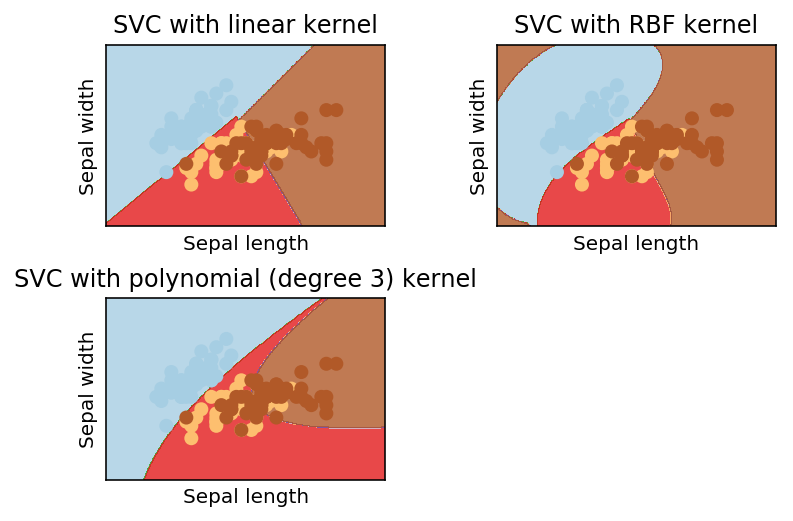

In [20]:
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(iris_X, iris_y)  # default kernel
svc = svm.SVC(kernel='linear', C=C).fit(iris_X, iris_y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(iris_X, iris_y)

# create a mesh to plot in
x_min, x_max = iris_X[:, 0].min() - 1, iris_X[:, 0].max() + 1
y_min, y_max = iris_X[:, 1].min() - 1, iris_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    # Plot also the training points
    plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

### 10. [Bonus] Compare SVM kernels visually on fake data using sklearn's `make_circles`.

Load `make_circles` from here:
```python
from sklearn.datasets import make_circles
```

Compare the linear, rbf, and poly kernels.

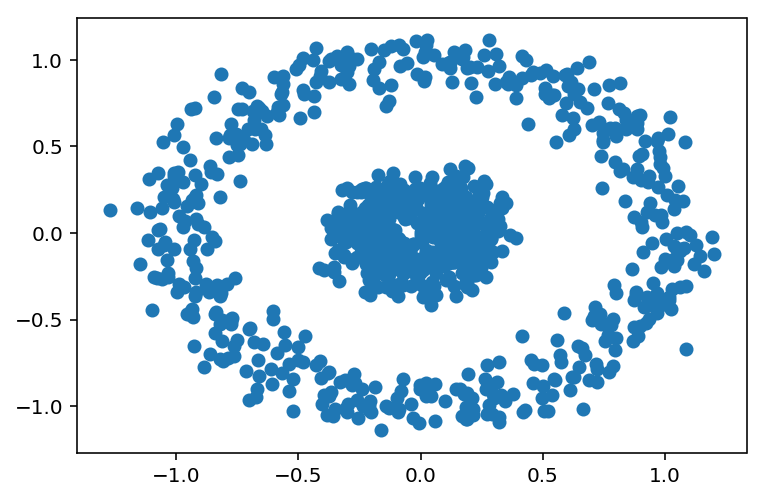

In [21]:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(circles_X[:,0], circles_X[:,1])

In [22]:
# let's try to predict them without graphs
logreg = LogisticRegression()
print cross_val_score(logreg, circles_X, circles_y, cv=5, scoring='accuracy').mean()

clf = svm.SVC(kernel = 'linear')     
print cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean()


clf = svm.SVC(kernel = 'poly', degree = 3)       
print cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean()

clf = svm.SVC(kernel = 'rbf')           
print cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean()


0.489
0.652 i like lines
0.567 i like 3rd degree polynomials
1.0 i like circles


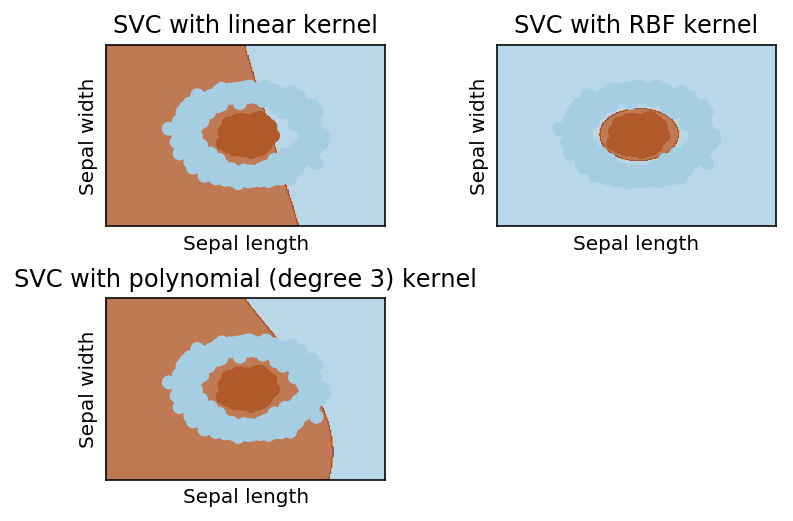

In [24]:
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(circles_X, circles_y)  # default kernel
svc = svm.SVC(kernel='linear', C=C).fit(circles_X, circles_y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(circles_X, circles_y)

# create a mesh to plot in
x_min, x_max = circles_X[:, 0].min() - 1, circles_X[:, 0].max() + 1
y_min, y_max = circles_X[:, 1].min() - 1, circles_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    # Plot also the training points
    plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

# a real thing of beauty

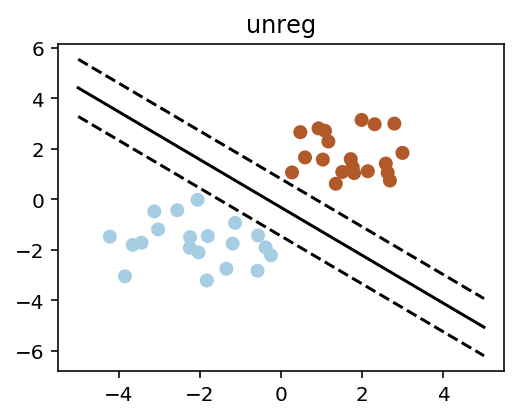

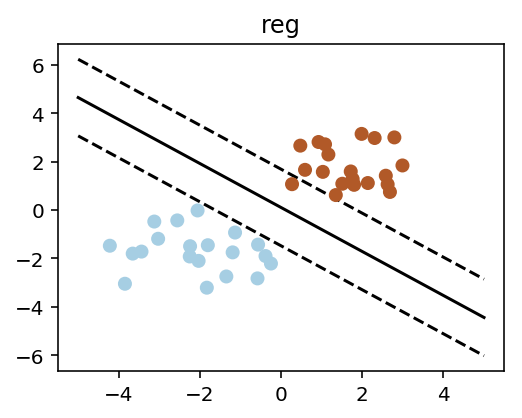

In [25]:
# Visualizing different C

X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    plt.title(name)

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    fignum = fignum + 1

plt.show()